In [32]:
import numpy as np
import matplotlib.pyplot as plt

In [33]:
def gauss1D(m, v, N, w):
    pos = np.arange(-w, w - w / N, 2 * w / N)
    insE = -0.5 * ((pos - m) / v) ** 2
    norm = 1 / (v * np.sqrt(2 * np.pi))
    res = norm * np.exp(insE)
    realDensity = np.stack((pos, res), axis=1)
    return realDensity

In [34]:
def kde(samples, h):
    # compute density estimation from samples with KDE
    # Input
    #  samples    : DxN matrix of data points
    #  h          : (half) window size/radius of kernel
    # Output
    #  estDensity : estimated density in the range of [-5,5]

    pos = np.arange(-5, 5.0, 0.1)
    N = len(samples)
    estProbs = np.zeros(pos.shape)

    for i in range(len(pos)):
      po = pos[i]
      u = (-1* abs(samples - po))/ (2*h*h)
      e = np.exp(u)
      norm = 1 / (h * np.sqrt(2 * np.pi))
      estProbs[i] = np.sum(norm * e)
    estProbs = estProbs / N

    estDensity = np.stack((pos, estProbs), axis=1)
    return estDensity

In [35]:
def knn(samples, k):
    # compute density estimation from samples with KNN
    # Input
    #  samples    : DxN matrix of data points
    #  k          : number of neighbors
    # Output
    #  estDensity : estimated density in the range of [-5, 5]

    assert k <= len(samples)

    pos = np.arange(-5, 5.0, 0.1)
    N = len(samples)
    estProbs = np.zeros(pos.shape)

    for i in range(len(pos)):
      po = pos[i]
      dist = abs(samples - po)
      sorted_dist = np.sort(dist)
      r = sorted_dist[k-1]
      v = (4/3) * np.pi * (r**3)
      estProbs[i] = k/v
    estProbs = estProbs / N

    estDensity = np.stack((pos, estProbs), axis=1)

    return estDensity

In [36]:
def parameters():
    k = 30  # knn neighbors
    h = 0.3  # kde windowsize / radius
    return h, k

In [37]:
h, k = parameters()

print('Question: Kernel/K-Nearest Neighborhood Density Estimators')

# Produce the random samples
samples = np.random.normal(0, 1, 100)

# Compute the original normal distribution
realDensity = gauss1D(0, 1, 100, 5)

Question: Kernel/K-Nearest Neighborhood Density Estimators


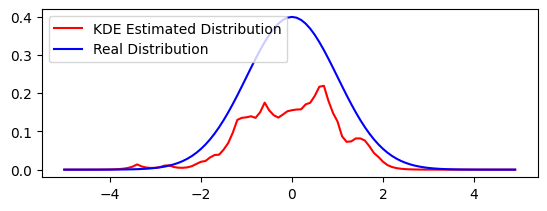

In [38]:
# Estimate the probability density using the KDE
estDensity = kde(samples, h)

# plot results
plt.subplot(2, 1, 1)
plt.plot(estDensity[:, 0], estDensity[:, 1], 'r', linewidth=1.5, label='KDE Estimated Distribution')
plt.plot(realDensity[:, 0], realDensity[:, 1], 'b', linewidth=1.5, label='Real Distribution')
plt.legend()

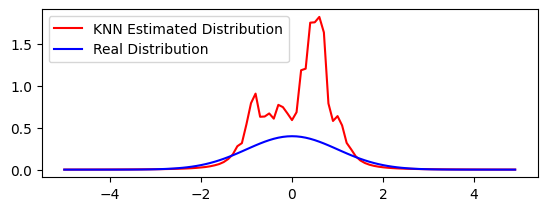

In [39]:
# Estimate the probability density using KNN
estDensity = knn(samples, k)

# Plot the distributions
plt.subplot(2, 1, 2)
plt.plot(estDensity[:, 0], estDensity[:, 1], 'r', linewidth=1.5, label='KNN Estimated Distribution')
plt.plot(realDensity[:, 0], realDensity[:, 1], 'b', linewidth=1.5, label='Real Distribution')
plt.legend()
plt.show()

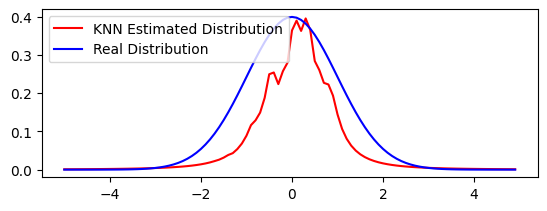

In [40]:
# Experimenting with a different k

estDensity = knn(samples, 50) # Though this is probably too high for a dataset with 100 samples?

# Plot the distributions
plt.subplot(2, 1, 2)
plt.plot(estDensity[:, 0], estDensity[:, 1], 'r', linewidth=1.5, label='KNN Estimated Distribution')
plt.plot(realDensity[:, 0], realDensity[:, 1], 'b', linewidth=1.5, label='Real Distribution')
plt.legend()
plt.show()